In [39]:
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

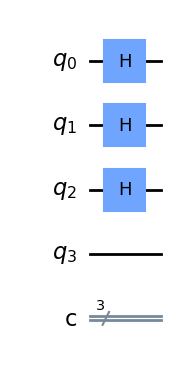

In [40]:
H = QuantumCircuit(4,3)
H.h(range(3))
H.draw()

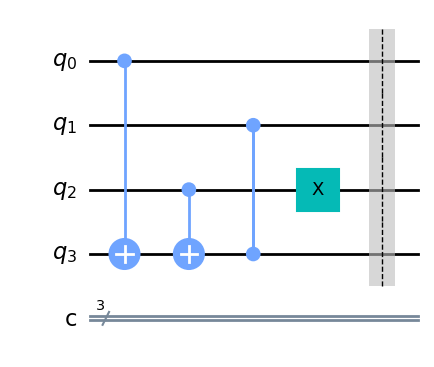

In [41]:
Uf = QuantumCircuit(4,3)
Uf.cx(0,3)
Uf.cx(2,3)
Uf.cz(3,1)
Uf.x(2)
Uf.barrier(range(4))
Uf.draw()

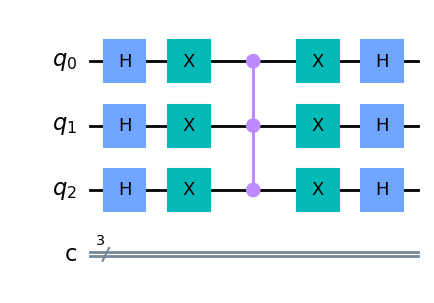

In [46]:
G = QuantumCircuit(3,3)
G.h(range(3))
G.x(range(3))
G.ccz(0,1,2)
G.x(range(3))
G.h(range(3))
G.draw()

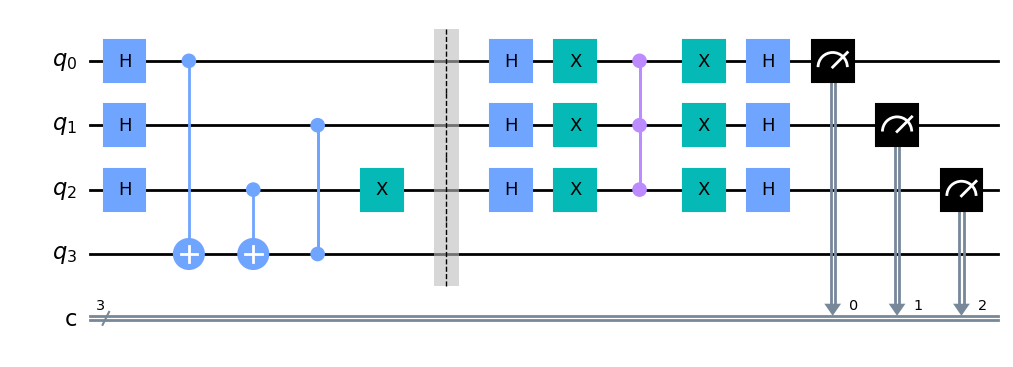

In [43]:
Grover = H.compose(Uf).compose(G)
Grover.measure(range(3),range(3))
Grover.draw()

In [44]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
service = QiskitRuntimeService()
backend = service.get_backend("ibmq_qasm_simulator")
sampler = Sampler(backend)
job = sampler.run(Grover)
job.result()

SamplerResult(quasi_dists=[{2: 0.25275, 0: 0.24125, 5: 0.25025, 7: 0.25575}], metadata=[{'shots': 4000}])

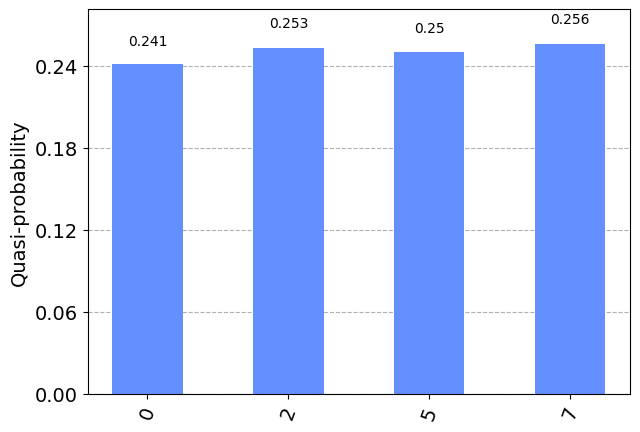

In [45]:
from qiskit.visualization import plot_histogram
plot_histogram(
    job.result().quasi_dists
)